In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_net_lda.csv')
data.isnull().sum()

Unnamed: 0    0
Tweet_In      0
dtype: int64

In [3]:
data.head()

,Unnamed: 0,Tweet_In
0,0,udah level 1 besok wfh 25 minggu jadwal wfhnya
1,1,wfh poko mantul uras emosi
2,2,syukur laku wfh amp wfo kantor
3,3,wach atuh zet kabar mun gawe bandung cimahi ma...
4,4,kr situasi baik usaha lanjut wfh kemba


In [3]:
mylist = list(dict.fromkeys(data['Tweet_In']))

In [4]:
# VEktorizing

In [5]:
text = mylist

In [6]:
# import library

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(text)
print(vectorizer.get_feature_names(), '\n')
print(vector.shape)

['00', '01', '02', '03', '04', '05', '08', '10', '100', '1000x', '100k', '10583441', '10an', '10k', '10kg', '10m', '10ribu', '11', '1111shopeedannct127', '11211996', '1142987', '11fess', '12', '123', '12min', '13', '14', '140', '14k', '15', '150k', '15minit', '16', '165', '17', '17k', '17rban', '18', '18x', '19', '1980', '1hr', '1jt', '1k', '1malaysia', '1mio', '1st', '1th', '1user', '1x', '20', '200gb', '200x', '2019', '2020', '2021', '2022', '20jeti', '21', '211031', '22', '22k', '22nya', '23', '24', '24j', '24jam', '24jem', '25', '250gr', '250ribu', '26', '27', '28', '29', '298', '2bln', '2bulan', '2hari', '2jeti', '2kali', '2minggu', '2mingguan', '2nd', '2th', '2thn', '2x', '30', '301', '30am', '30mbps', '31', '315', '33', '34k', '350', '36', '365', '390', '3d', '3hari', '3jt', '3some', '3x', '400k', '40rb', '42', '43', '430', '43104101', '45', '4b', '4hari', '4k', '4kg', '50', '500m', '500rb', '50gb', '52', '54', '54nt41', '56', '58', '5g', '5hakir', '5jt', '5kg', '5thn', '6146070

In [7]:
# Using gensim

In [8]:
# Tokenizing

text_list = [i.split() for i in text]
print(len(text_list))
print(text_list)

2527
[['udah', 'level', '1', 'besok', 'wfh', '25', 'minggu', 'jadwal', 'wfhnya'], ['wfh', 'poko', 'mantul', 'uras', 'emosi'], ['syukur', 'laku', 'wfh', 'amp', 'wfo', 'kantor'], ['wach', 'atuh', 'zet', 'kabar', 'mun', 'gawe', 'bandung', 'cimahi', 'mah', 'aing', 'gabut', 'euy', 'wfh', 'keki'], ['kr', 'situasi', 'baik', 'usaha', 'lanjut', 'wfh', 'kemba'], ['list', 'dilakuin', 'bareng', 'pcr', 'masak', 'bareng', 'kuliner', 'jalan', 'jalan', 'pake', 'transportasi', 'makan', 'ngewarteg', 'dud'], ['lawyer', 'takleh', 'wfh', 'sbb', 'peguam', 'essential'], ['peak', 'hours', 'mende', 'pergi', 'kerja', 'kena', 'masuk', 'office', 'tu', 'orang', 'wfh', 'kot', '9'], ['wfh', 'udah', 'ngerusakin', 'mouse', '3', 'biji'], ['betulllll', 'masuk', 'ofis', 'mcm', 'je', 'dekat', 'if', 'kena', 'wfh', 'for'], ['upgrade', 'skill', 'wfh', 'pilih', 'giat', 'rekomendasi', 'cari', 'ilmu'], ['wfh', 'quarantine', 'rumah', '7', 'kerja'], ['hitung', 'wfh'], ['omo', 'jumaat', 'wfh'], ['wfh'], ['pikir', 'wfh', 'bikin', '

In [9]:
!pip install gensim

In [9]:
# Create phrase using Gensim, Bigram and Trigram
import gensim
from gensim.models import Phrases

In [10]:
# Create bigrams and trigrams to doc, with minimum count 5, mean only upper than 5 times or more.
bigram = gensim.models.Phrases(text_list, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[text_list], threshold=100)

In [11]:
# Tokening bigram and trigram into document

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)

In [12]:
# Create dictionary from text_list

from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

# no_below = keep token which are contained in at least no_below document
# no_above = keep token which are contained in no more than no_above document

print(dictionary)

Dictionary(832 unique tokens: ['1', 'besok', 'jadwal', 'level', 'minggu']...)


In [13]:
# Convert corpus into matrix using dictionary

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

# doc2bow is a function which convert document(list of words) into bag-of-words (vectorizing method)

print(len(doc_term_matrix))
print(doc_term_matrix[10])
tfidf = models.TfidfModel(doc_term_matrix) # build tfidf model
corpus_tfidf = tfidf[doc_term_matrix]

2527
[(42, 1), (43, 1), (44, 1), (45, 1)]


In [14]:
# modeling using gensim and using Coherence Score to evaluate model

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# Fuction to compute coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                                    dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [15]:
# Apply function

start = 1
limit = 10 # 10 topic
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start,
                                                        limit=limit, step=step)

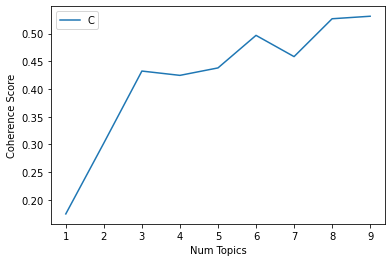

In [16]:
# Visualize the graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('Coherence Values'), loc='best')
plt.show()

In [17]:
# Print Coherence Score

for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, ' has Coherence Value of', round(cv, 5))

Num Topics = 1  has Coherence Value of 0.17479
Num Topics = 2  has Coherence Value of 0.30258
Num Topics = 3  has Coherence Value of 0.43235
Num Topics = 4  has Coherence Value of 0.42459
Num Topics = 5  has Coherence Value of 0.43802
Num Topics = 6  has Coherence Value of 0.4967
Num Topics = 7  has Coherence Value of 0.4584
Num Topics = 8  has Coherence Value of 0.52666
Num Topics = 9  has Coherence Value of 0.53118


In [18]:
# n_topic = 9, best coherence value

In [19]:
# Finding dominant word

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=9) # after look at coherence values
for idx, topic in model.print_topics():
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.016*"full" + 0.016*"nonton" + 0.013*"tinggal" + 0.012*"enak" + 0.012*"sih" + 0.012*"wfo" + 0.011*"kalo" + 0.011*"gak" + 0.010*"kali" + 0.010*"mah"
Topic: 1 Word: 0.020*"pas" + 0.017*"bareng" + 0.013*"kemarin" + 0.012*"kerja" + 0.012*"desember" + 0.011*"hadap" + 0.010*"asik" + 0.009*"nemenin" + 0.009*"bgt" + 0.008*"temen"
Topic: 2 Word: 0.015*"asa" + 0.014*"me" + 0.014*"coba" + 0.013*"back_to" + 0.012*"biasa" + 0.012*"gak" + 0.010*"kalo" + 0.010*"udah" + 0.010*"wfo" + 0.009*"susah"
Topic: 3 Word: 0.019*"full" + 0.017*"alhamdulillah" + 0.015*"mati" + 0.014*"2" + 0.011*"work_from" + 0.011*"kerja" + 0.011*"mati_listrik" + 0.009*"masak" + 0.009*"ngantuk" + 0.008*"bos"
Topic: 4 Word: 0.016*"ka" + 0.016*"udah" + 0.015*"wfo" + 0.014*"besok" + 0.014*"nih" + 0.013*"kerja" + 0.011*"untung" + 0.011*"kek" + 0.010*"ofis" + 0.010*"gin"
Topic: 5 Word: 0.031*"minggu" + 0.022*"sih" + 0.015*"jumaat" + 0.013*"khamis" + 0.013*"je" + 0.013*"tenang" + 0.013*"wfo" + 0.013*"office" + 0.012*"ka

In [20]:
# Show top 10 words in each topic

top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn=10)])

In [21]:
df_new = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
df_new

,Topic,Word,P
0,0,full,0.015825
1,0,nonton,0.015515
2,0,tinggal,0.012927
3,0,enak,0.012373
4,0,sih,0.011938
...,...,...,...
85,8,rumah,0.011050
86,8,pusing,0.010335
87,8,kerja,0.010105
88,8,meeting,0.009715


In [30]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


In [22]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.save_html(vis, 'lda-gensim-sentiment-netral.html')